In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = "housing.csv"
data = pd.read_csv(filename)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [33]:
train_data = x_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8060,-118.20,33.85,46.0,1854.0,462.0,1360.0,429.0,2.4844,<1H OCEAN,158200.0
4024,-118.52,34.18,42.0,1611.0,410.0,879.0,386.0,3.1923,<1H OCEAN,221800.0
10871,-117.91,33.72,32.0,2436.0,504.0,2839.0,516.0,4.5607,<1H OCEAN,182100.0
264,-122.21,37.78,44.0,1729.0,414.0,1240.0,393.0,2.3125,NEAR BAY,102800.0
14495,-117.20,32.85,26.0,2298.0,549.0,980.0,555.0,2.4207,NEAR OCEAN,213500.0
...,...,...,...,...,...,...,...,...,...,...
16591,-121.44,37.73,7.0,8363.0,1314.0,3907.0,1068.0,5.3321,INLAND,208100.0
9055,-118.13,34.69,32.0,3670.0,765.0,1986.0,673.0,3.6820,INLAND,108800.0
6007,-117.76,34.07,51.0,1538.0,394.0,1173.0,388.0,2.3156,INLAND,109800.0
5384,-118.40,34.02,27.0,515.0,201.0,397.0,228.0,2.4135,<1H OCEAN,184400.0


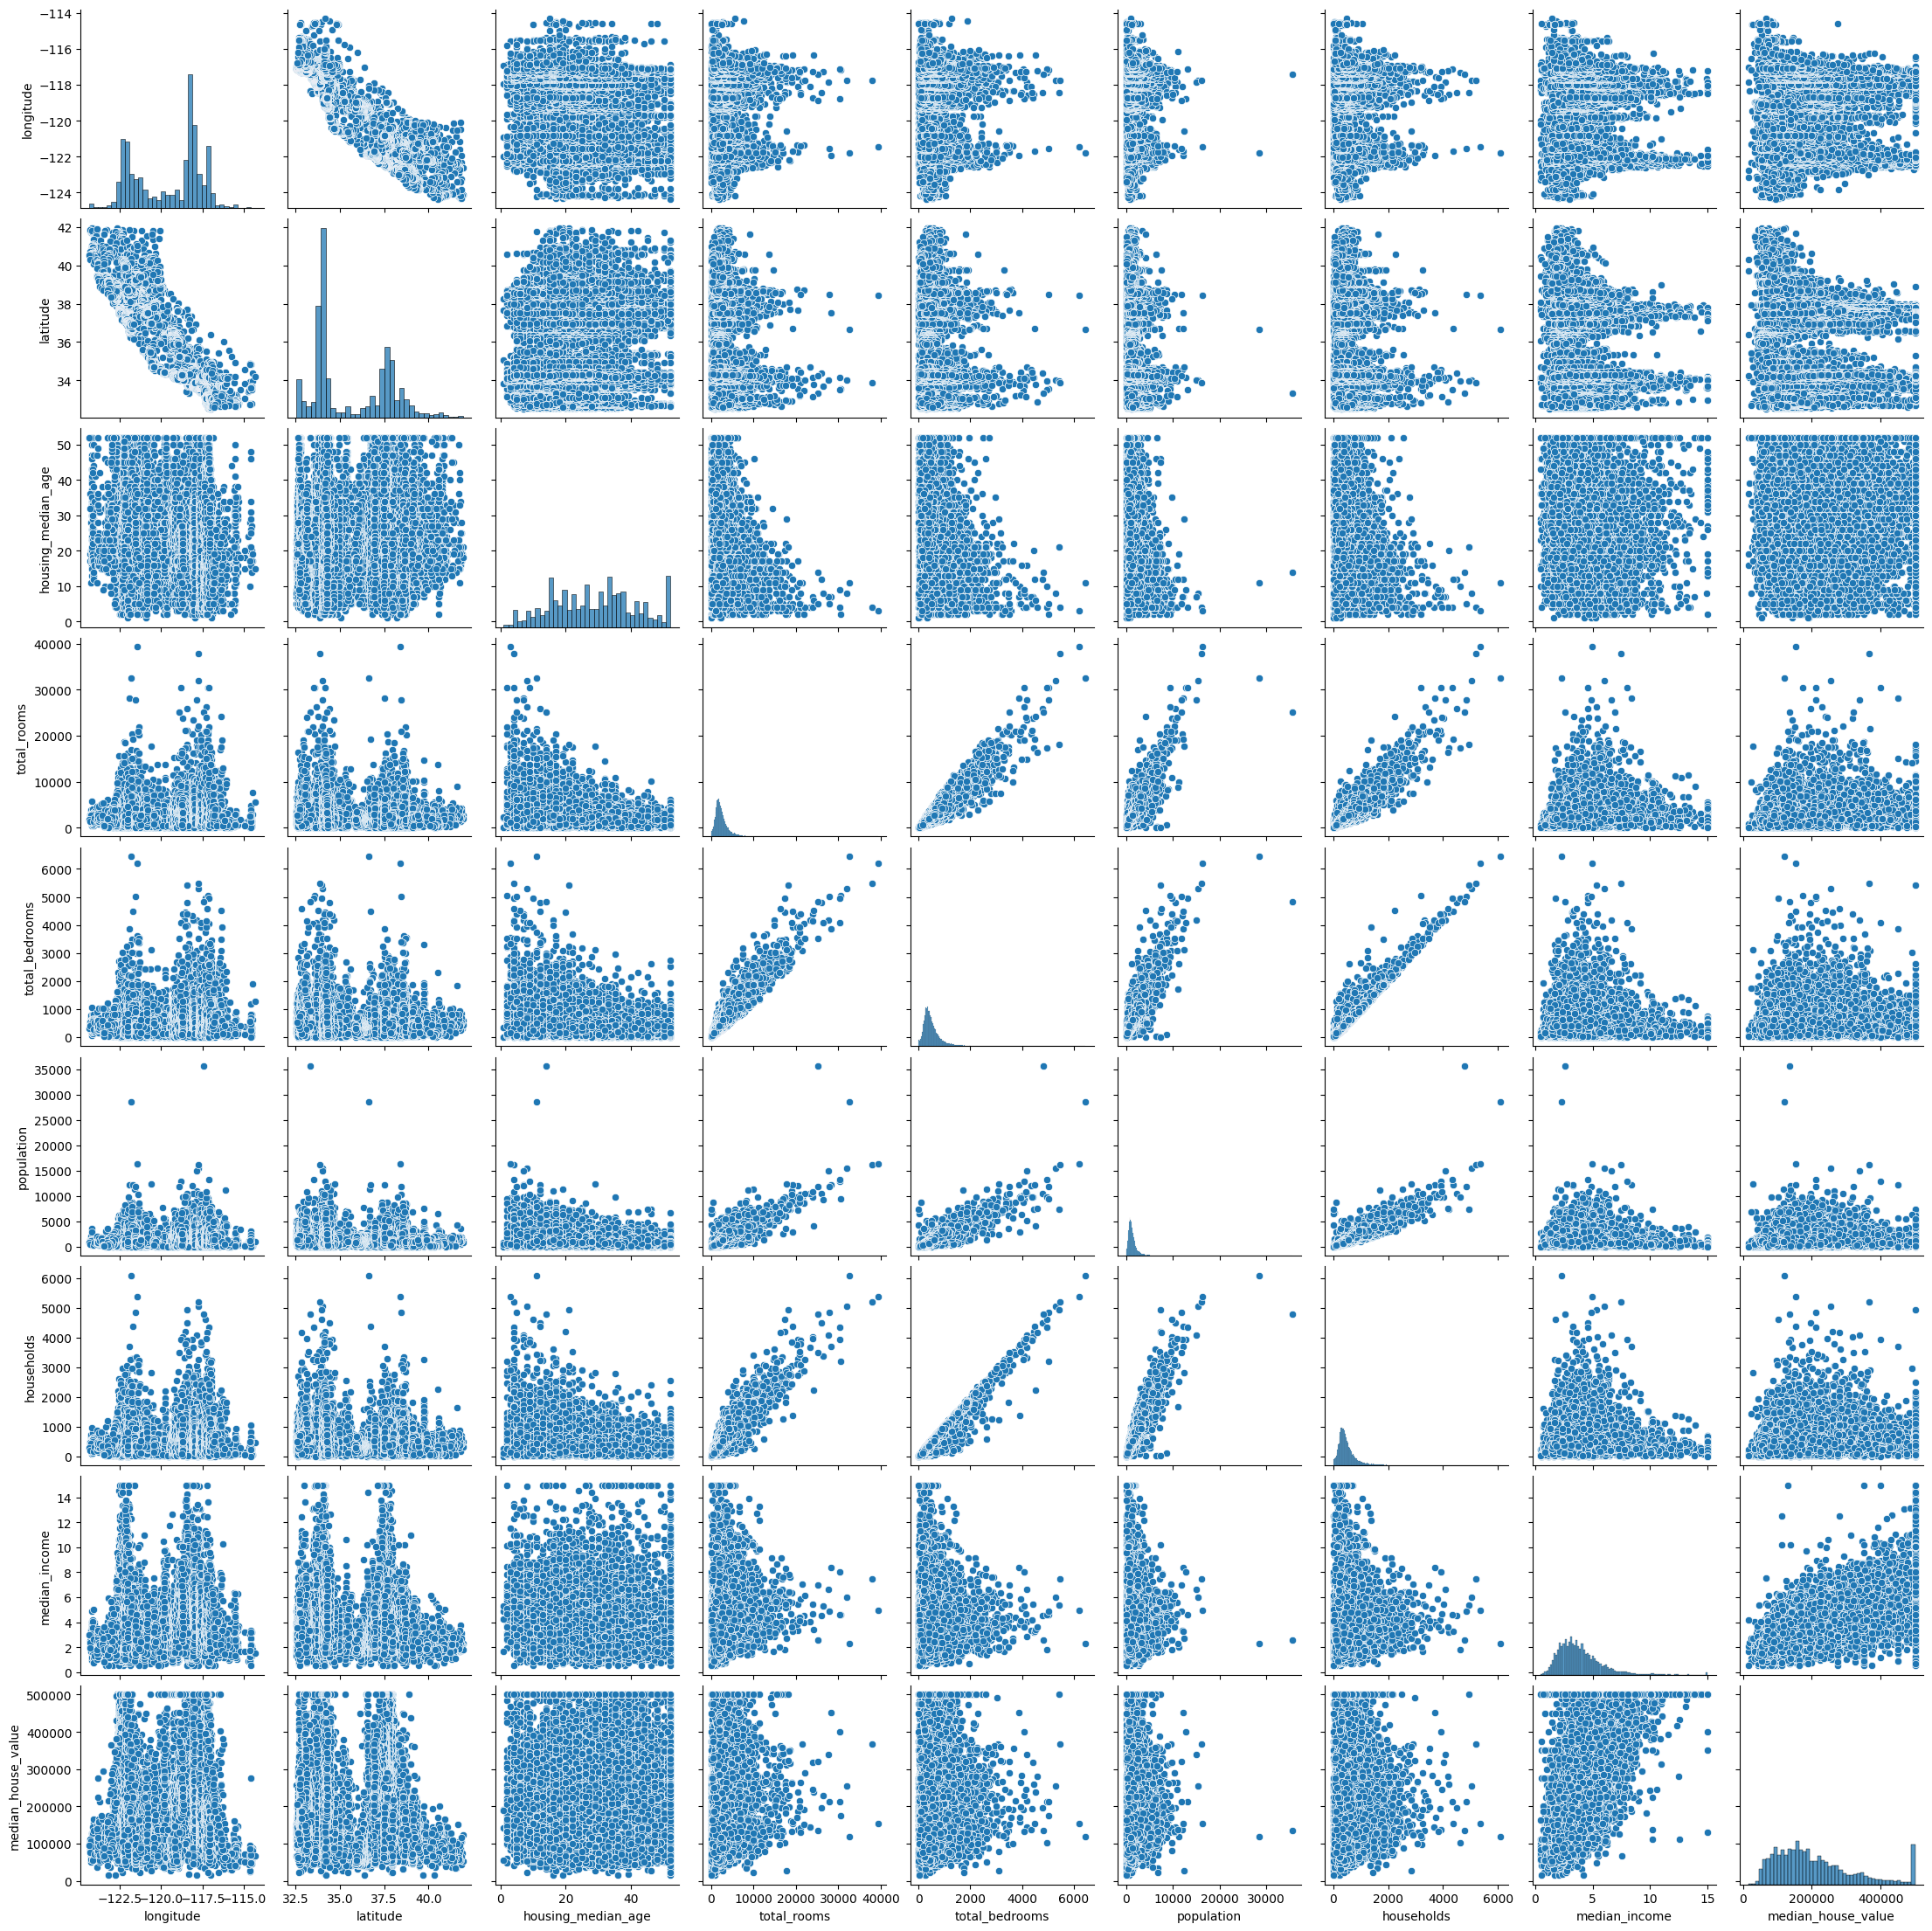

In [13]:
sns.pairplot(data)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

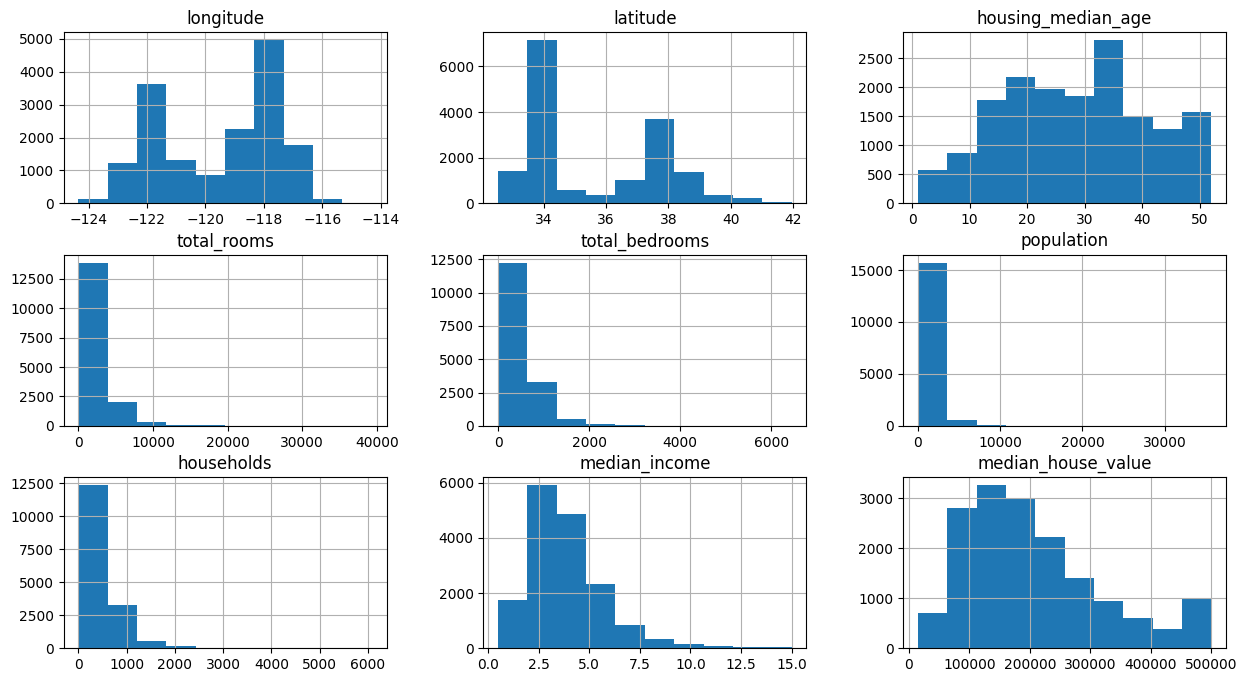

In [14]:
train_data.hist(figsize =(15,8))

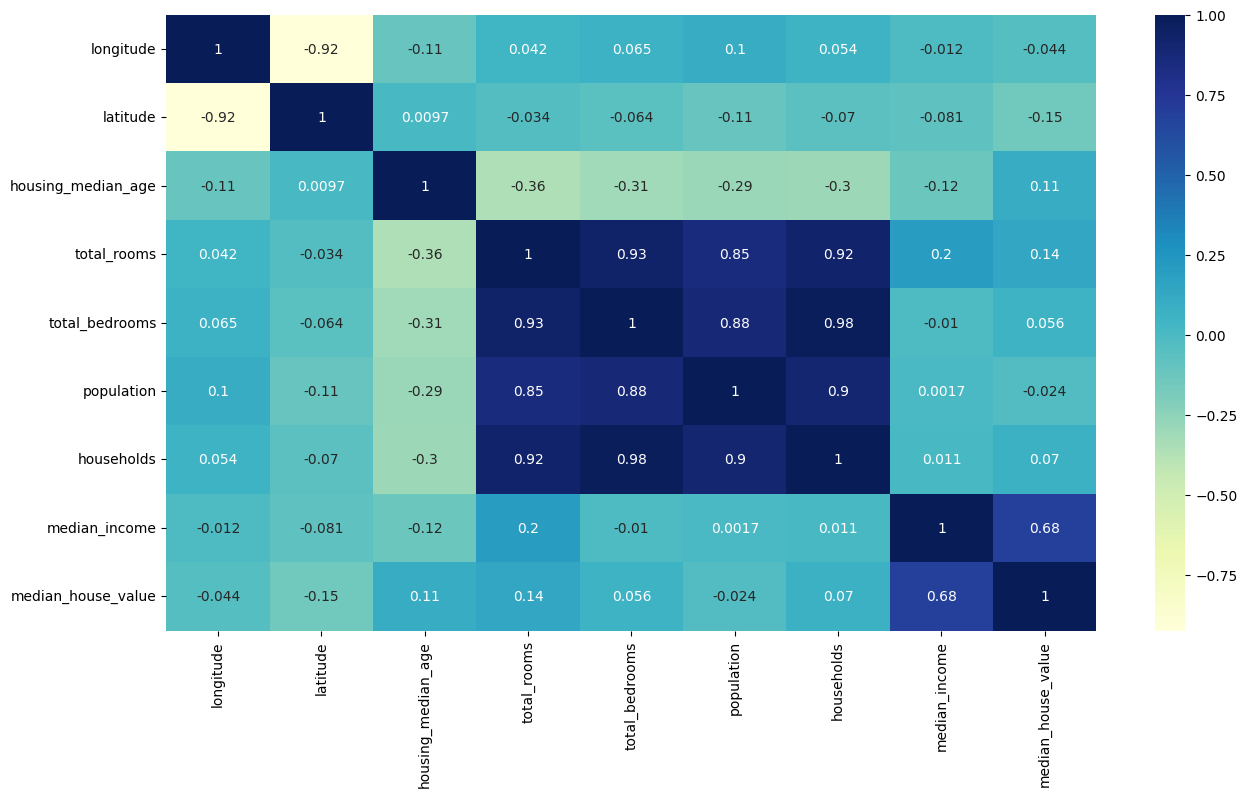

In [15]:
numeric_data = train_data.select_dtypes(include=['number'])

# Plot heatmap of correlations
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

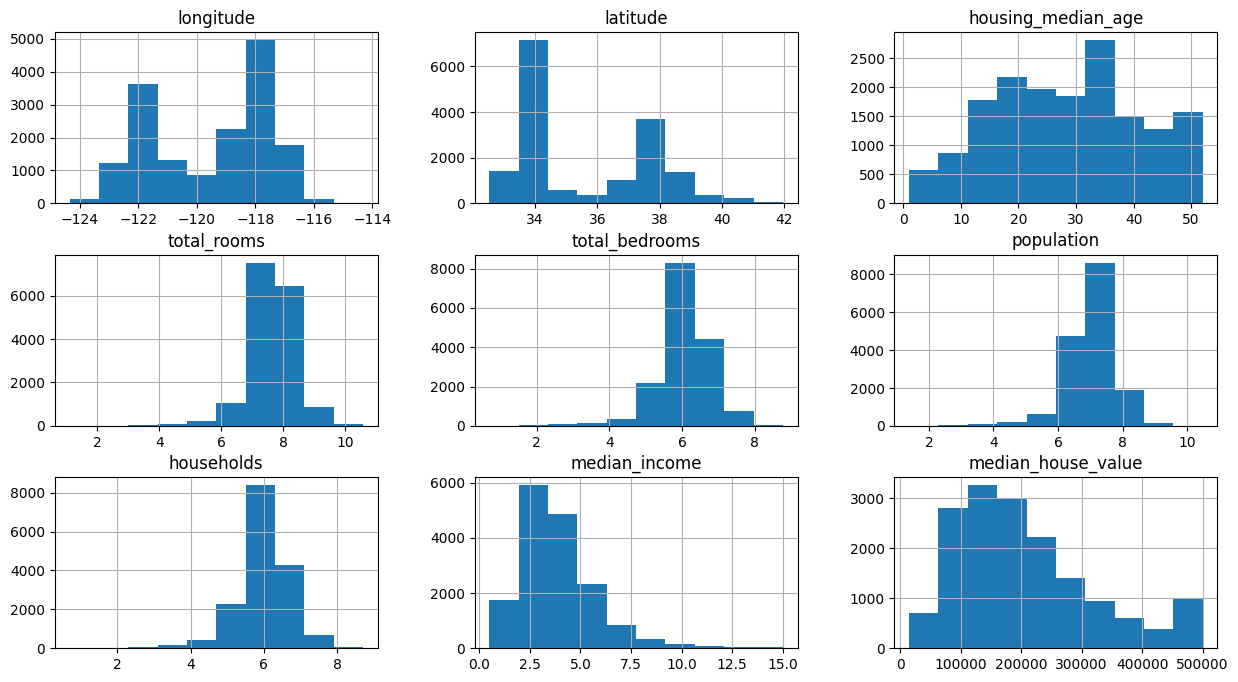

In [17]:
train_data.hist(figsize =(15,8))

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])
train_data['ocean_proximity'] = data['ocean_proximity']


In [20]:
train_data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
8060,-118.20,33.85,46.0,7.525640,6.137727,7.215975,6.063785,2.4844,158200.0,True,False,False,False,False
4024,-118.52,34.18,42.0,7.385231,6.018593,6.779922,5.958425,3.1923,221800.0,True,False,False,False,False
10871,-117.91,33.72,32.0,7.798523,6.224558,7.951559,6.248043,4.5607,182100.0,True,False,False,False,False
264,-122.21,37.78,44.0,7.455877,6.028279,7.123673,5.976351,2.3125,102800.0,False,False,False,True,False
14495,-117.20,32.85,26.0,7.740230,6.309918,6.888572,6.320768,2.4207,213500.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,-121.44,37.73,7.0,9.031692,7.181592,8.270781,6.974479,5.3321,208100.0,False,True,False,False,False
9055,-118.13,34.69,32.0,8.208219,6.641182,7.594381,6.513230,3.6820,108800.0,False,True,False,False,False
6007,-117.76,34.07,51.0,7.338888,5.978886,7.068172,5.963579,2.3156,109800.0,False,True,False,False,False
5384,-118.40,34.02,27.0,6.246107,5.308268,5.986452,5.433722,2.4135,184400.0,True,False,False,False,False


In [21]:
train_data['ocean_proximity'] = train_data['ocean_proximity'].astype(int)

<Axes: >

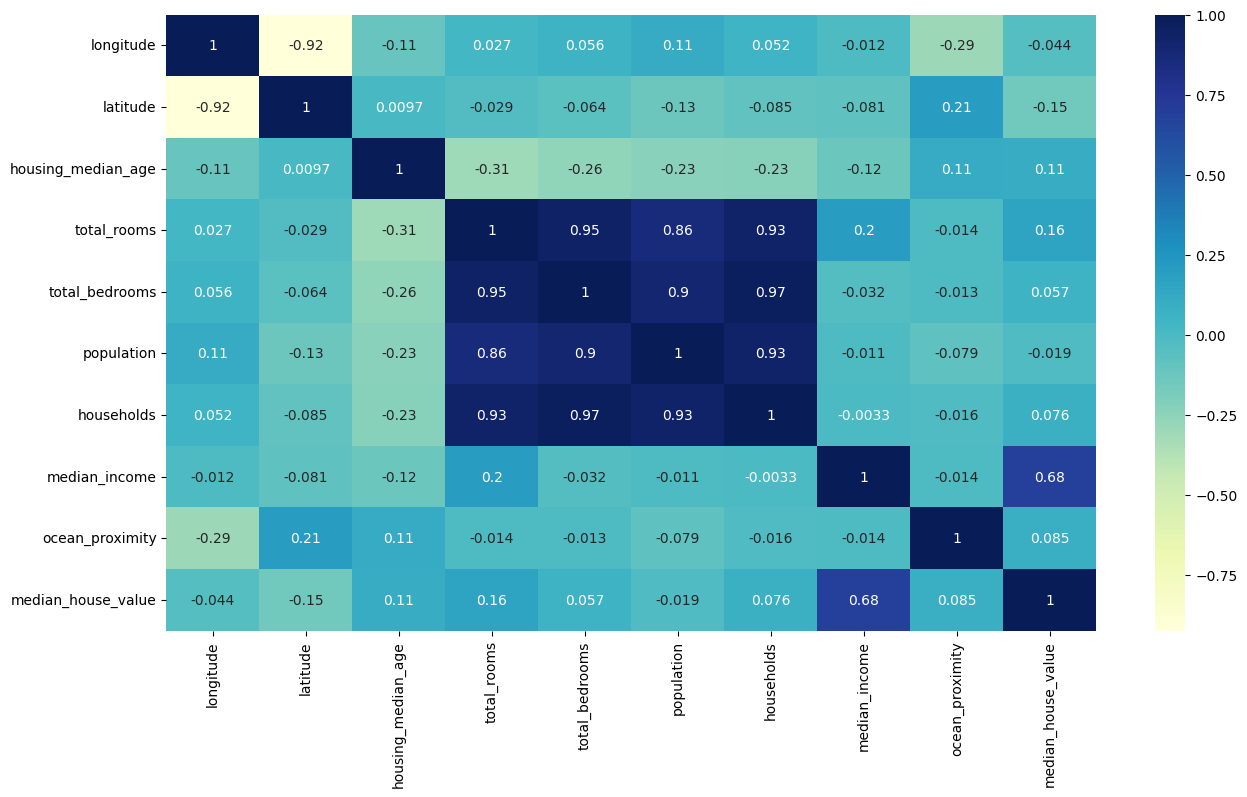

In [22]:
plt.figure(figsize =(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

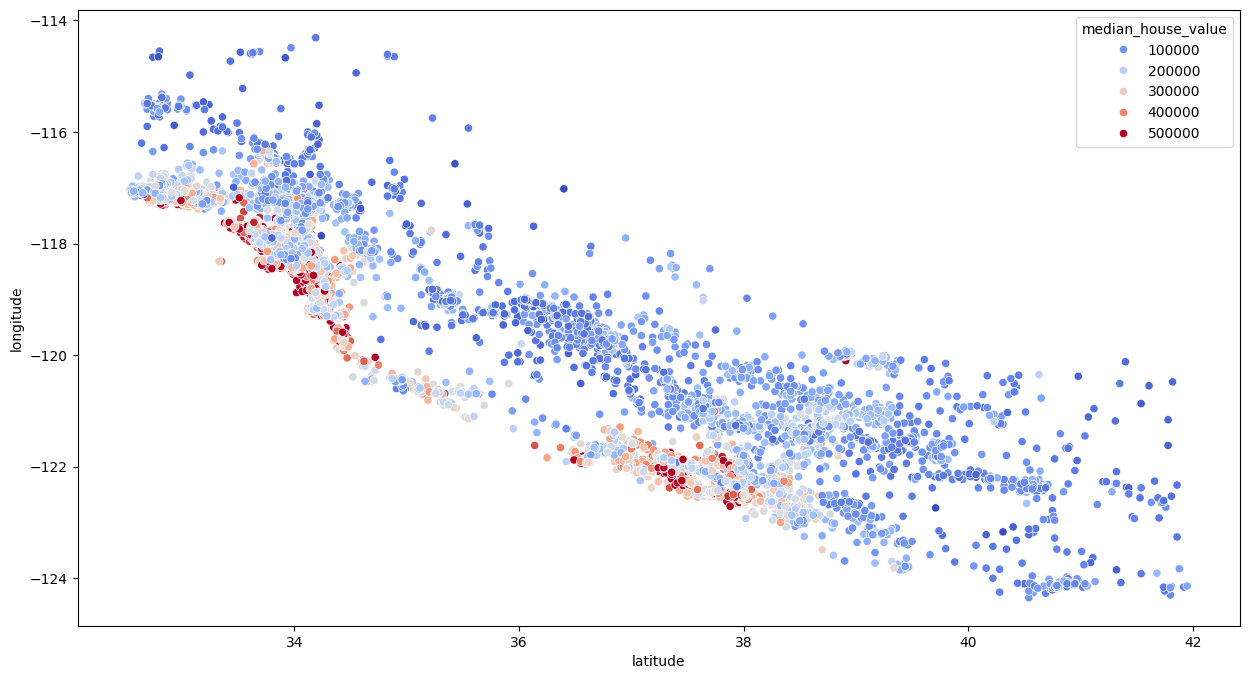

In [23]:
plt.figure(figsize =(15,8))
sns.scatterplot(x ="latitude",y = "longitude",data = train_data,hue ="median_house_value",palette ="coolwarm")

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 8060 to 15454
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  int32  
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 1.8 MB


In [25]:
train_data['households_room'] =  train_data['total_rooms']/train_data['households']

In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

<Axes: >

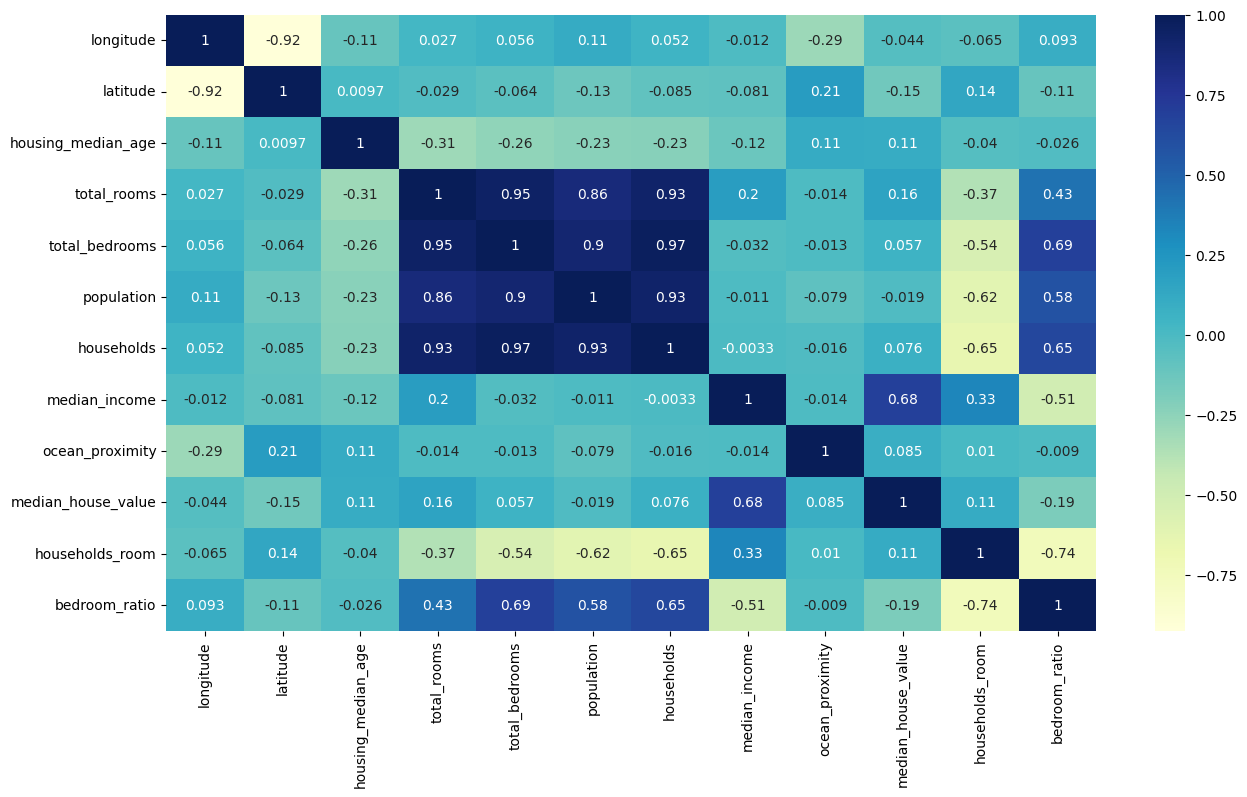

In [27]:
plt.figure(figsize =(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [28]:

from sklearn.linear_model import LinearRegression
# x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data,train_data['median_house_value']
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Initialize and fit the Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)



LinearRegression()

In [29]:
test_data = x_test.copy()  
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['households_room'] = test_data['total_rooms'] / test_data['households']
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']


test_data['ocean_proximity'] = data['ocean_proximity'] 


score = reg.score(test_data, y_test)
print("linear regration  score:", score*100)


linear regration  score: 67.19014237276572


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']


x_train['households_room'] = x_train['total_rooms'] / x_train['households']
x_train['bedroom_ratio'] = x_train['total_bedrooms'] / x_train['total_rooms']


x_test = test_data.copy()
x_test['households_room'] = x_test['total_rooms'] / x_test['households']
x_test['bedroom_ratio'] = x_test['total_bedrooms'] / x_test['total_rooms']


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test) 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train_scaled, y_train)

y_pred_dtr = dtr.predict(x_test_scaled)

from sklearn.metrics import r2_score
R2_Score_dtr = round(r2_score(y_test, y_pred_dtr) * 100, 2)

print("R-squared Score (in percentage):", R2_Score_dtr)


R-squared Score (in percentage): 66.69


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean, std

rf = RandomForestRegressor(random_state=1)

cv_scores = cross_val_score(rf, x_train_scaled, y_train, cv=5)

print("RandomForestRegressor:")
print("Mean CV Score:", mean(cv_scores)*100)


RandomForestRegressor:
Mean CV Score: 80.73211260304207
